<a href="https://colab.research.google.com/github/anupamapandey/anupamanew/blob/main/Business_Case_Aerofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'aerofit-treadmill-csv:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4937532%2F8311518%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240509%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240509T160321Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8d5c5cee3b5ee46e231be997563766a6f575c57e6b59ea2e281463f567ca1e08a6bf1b08ea65d0600e4dd1861ce3a4d040b50f0e07a2717b610174dfbe6f2bb68ae5133d9f767a5b776f83af6c617ca0a2b674a77b699694499df50107fb3135ad461f8ff39c588ecb317b4975eefe20da32d83615675b56b9ddecbdbe2e75f6f7bcb0a5dd2a60d5ca1bf54b618a0a2fb6d025ddb40ceda72702ed2fd37951a43ea4ef64bed9b947476bdea620cd574fc37b7e3ae9fce67101104d00053e1b41e57f76e1b591f7ab981e8a5603370afa9c0c7273d26f74a6e0a336cb85a57d2122b44a5541aea2688c9423fe8380bf017fcf6f8e04c468cad26452ec95c3cce9'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/aerofit-treadmill-csv/aerofit_treadmill.csv


In [ ]:
data_path = "/kaggle/input/aerofit-treadmill-csv/aerofit_treadmill.csv"
df = pd.read_csv(data_path)
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
df.shape[0]

180

In [ ]:
df.shape[1]

9

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


There are no missing values in the data.

There are 3 unique products in the dataset.

KP281 is the most frequent product.

Minimum & Maximum age of the person is 18 & 50, mean is 28.79 and 75% of persons have age less than or equal to 33.

Most of the people are having 16 years of education i.e. 75% of persons are having education <= 16 years.

Out of 180 data points, 104's gender is Male and rest are the female.

Standard deviation for Income & Miles is very high. These variables might have the outliers in it.

In [ ]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

There are three unique product availbale in dataset

Univariate Analysis

Understanding the distribution of the data for the quantitative attributes:

Age

Education

Usage

Fitness

Income

Miles

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

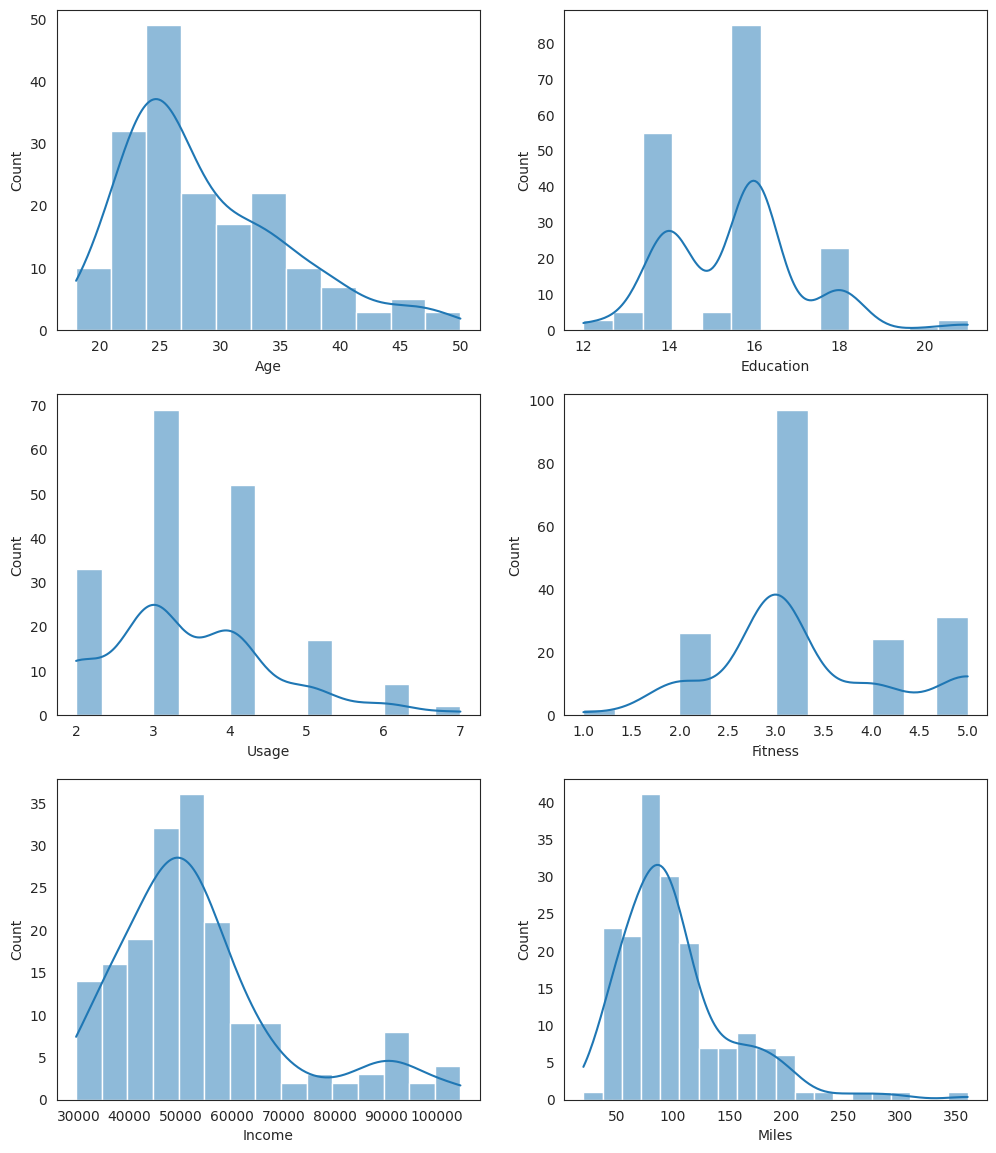

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)
sns.histplot(data=df,x='Age',kde=True,ax=axis[0,0])
sns.histplot(data=df,x='Education',kde=True,ax=axis[0,1])
sns.histplot(data=df,x='Usage',kde=True,ax=axis[1,0])
sns.histplot(data=df,x='Fitness',kde=True,ax=axis[1,1])
sns.histplot(data=df,x='Income',kde=True,ax=axis[2,0])
sns.histplot(data=df,x='Miles',kde=True,ax=axis[2,1])
plt.show()

Outliners detection using BoxPlots

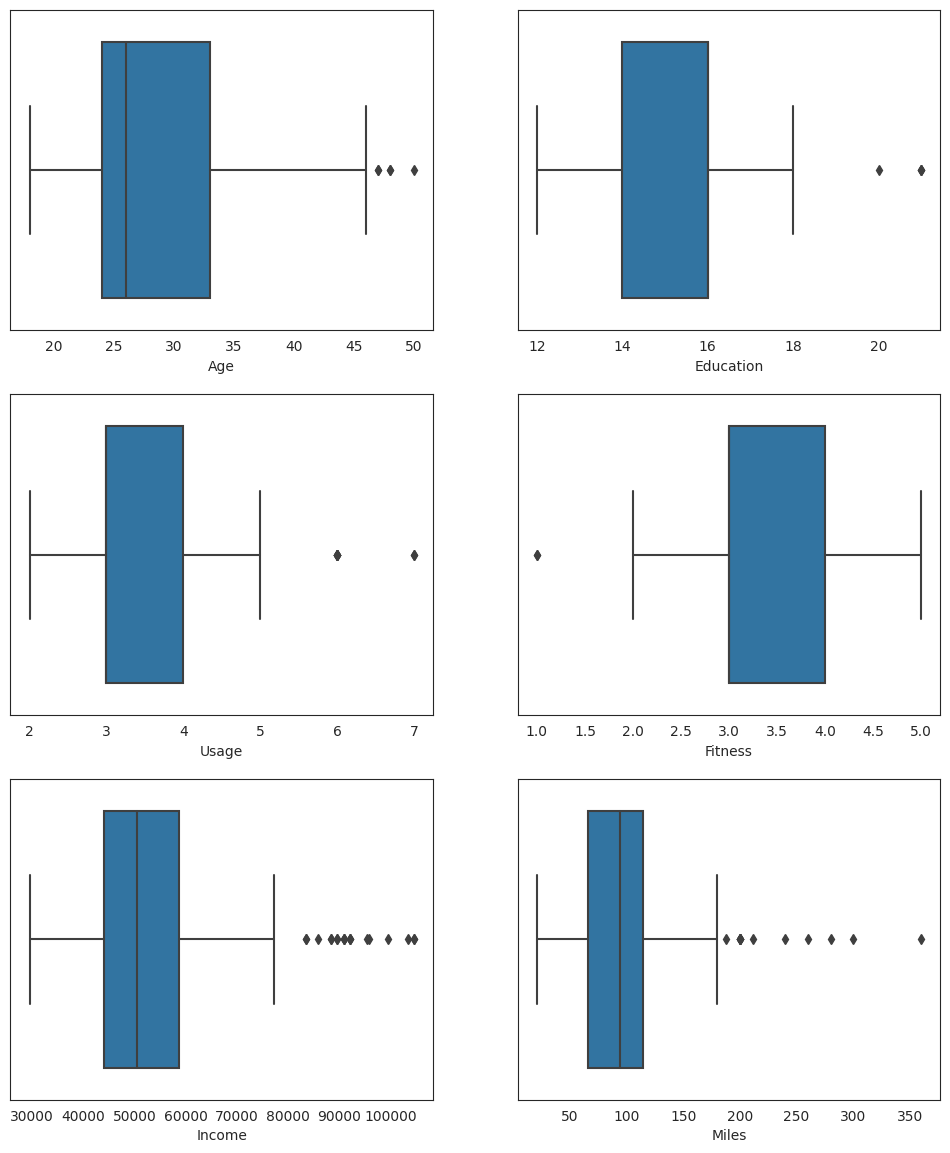

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df,x='Age',orient='h',ax=axis[0,0])
sns.boxplot(data=df,x='Education',orient='h',ax=axis[0,1])
sns.boxplot(data=df,x='Usage',orient='h',ax=axis[1,0])
sns.boxplot(data=df,x='Fitness',orient='h',ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df,x='Miles',orient='h',ax=axis[2,1])
plt.show()

Obervation

Even from the boxplots it is quite clear that:

Age, Education and Usage are having very few outliers.

While Income and Miles are having more outliers.

Understanding the distribution of the data for the qualitative attributes:

Product

Gender

MaritalStatus

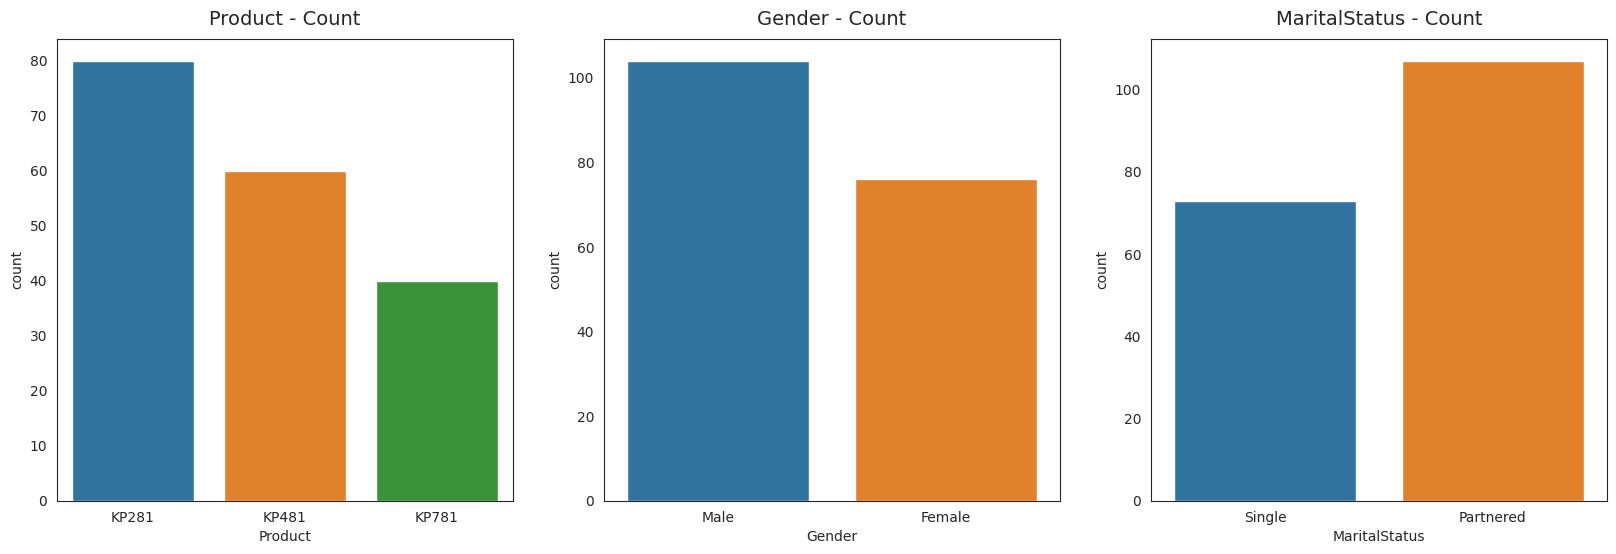

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.countplot(data=df,x='Product',ax=axis[0])
sns.countplot(data=df,x='Gender',ax=axis[1])
sns.countplot(data=df, x='MaritalStatus',ax=axis[2])

axis[0].set_title("Product - Count",pad=10,fontsize=14)
axis[1].set_title("Gender - Count",pad=10,fontsize=14)
axis[2].set_title("MaritalStatus - Count",pad=10,fontsize=14)
plt.show()

Obervations

KP281 is the most frequent product.

Thare are more Males in the data than Females.

More Partnered persons are there in the data.

To be precise - normalized count for each variable is shown below

In [ ]:
df1=df[['Product','Gender','MaritalStatus']].melt()
df1.groupby(['variable','value'])[['value']].count() /len(df)

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

**Obervations**

**Product**

44.44% of the customers have purchased KP2821 product.

33.33% of the customers have purchased KP481 product.

22.22% of the customers have purchased KP781 product.

**Gender**

57.78% of the customers are Male.

**MaritalStatus**

59.44% of the customers are Partnered.

**Bivariant Analysis:**

Checking if features-Gender or MaritalStatus have any effect on the product purchased  

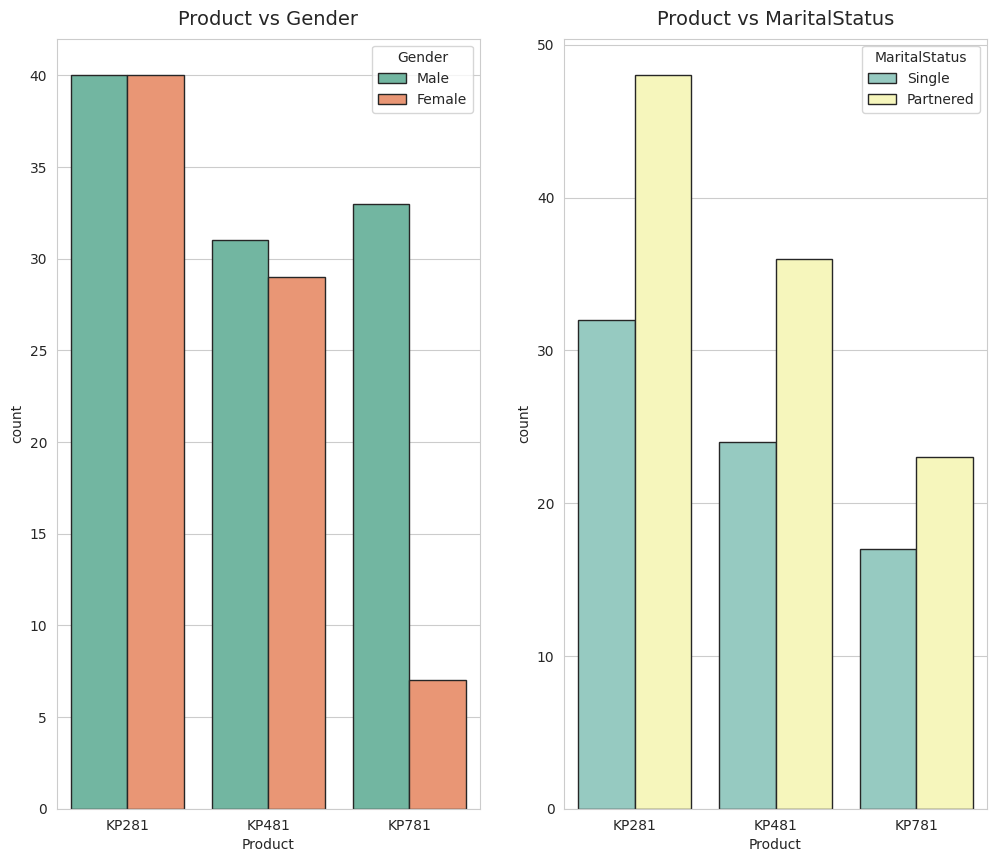

In [ ]:
sns.set_style(style='whitegrid')
fig, axis=plt.subplots(nrows=1, ncols=2 , figsize=(12,10))
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15", palette='Set2',ax=axis[0])
sns.countplot(data=df,x='Product',hue='MaritalStatus',edgecolor='0.15',palette='Set3',ax=axis[1])

axis[0].set_title('Product vs Gender', pad=10,fontsize=14)
axis[1].set_title('Product vs MaritalStatus', pad=10,fontsize=14)
plt.show()


**Obervations**

**Product vs Gender**

Equal number of males and females have purchased KP281 product and Almost same for the product KP481

Most of the Male customers have purchased the KP781 product.

**Product vs MaritalStatus**

Customer who is Partnered, is more likely to purchase the product.

Checking if following features have any effect on the product purchased:

Age

Education

Usage

Fitness

Income

Miles

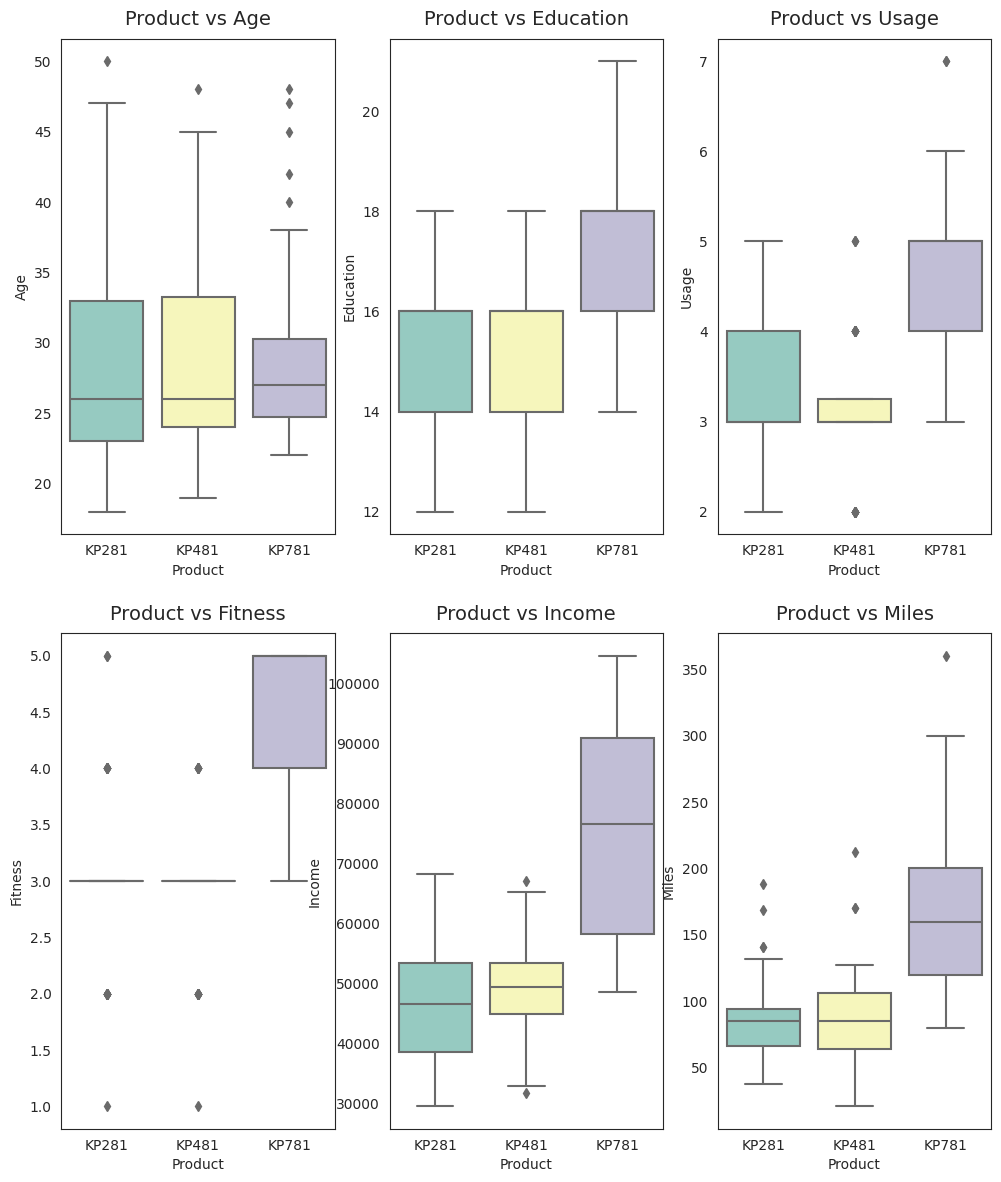

In [ ]:
attrs=['Age','Education','Usage','Fitness','Income','Miles']
sns.set_style(style='white')
fig, axis=plt.subplots(nrows=2, ncols=3, figsize=(12,10))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=attrs[count],ax=axis[i,j],palette='Set3')
        axis[i,j].set_title(f"Product vs {attrs[count]}",pad=10,fontsize=14)
        count += 1

plt.show()


**Observations**

**Product vs Age**

Customers purchasing products KP281 & KP481 are having same Age median value.

Customers whose age lies between 25-30, are more likely to buy KP781 product

**Product vs Education**

Customers whose Education is greater than 16, have more chances to purchase the KP781 product.

While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.

**Product vs Usage**

Customers who are planning to use the treadmill greater than 4 times a week, are more likely to

purchase the KP781 product.

While the other customers are likely to purchasing KP281 or KP481.

**Product vs Fitness
**
The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781
product.

**Product vs Income**

Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product.

**Product vs Miles**

If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product.

Multivariate Analysis¶****

Age

Education

Usage

Fitness

Income

Miles

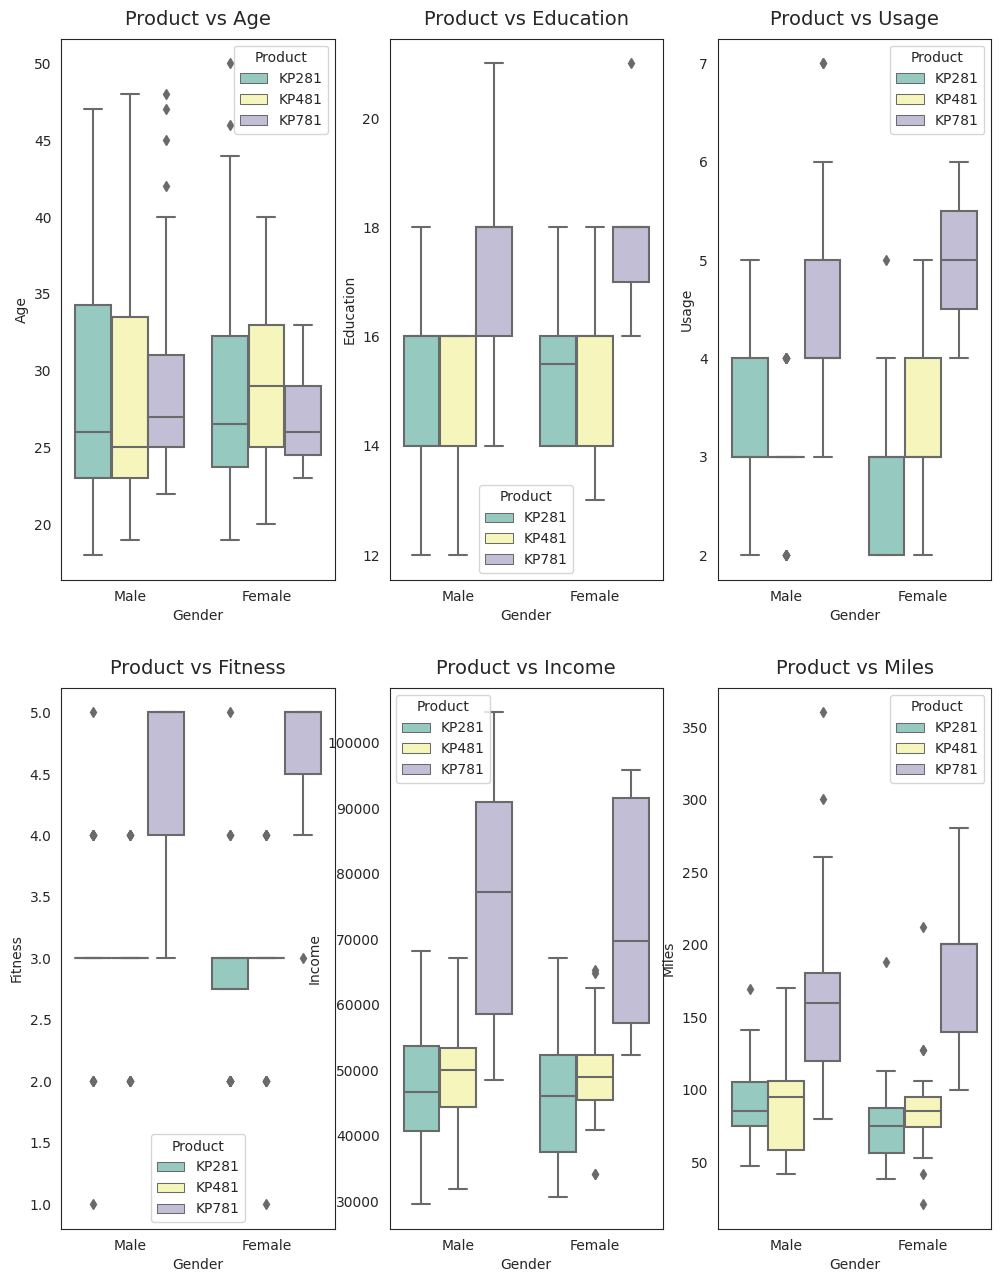

In [ ]:
attrs=['Age','Education','Usage','Fitness','Income','Miles']
fig, axis=plt.subplots(nrows=2, ncols=3, figsize=(12,10))
fig.subplots_adjust(top=1.3)
count=0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Gender', y=attrs[count], hue='Product', ax=axis[i,j],palette='Set3')

        axis[i,j].set_title(f"Product vs {attrs[count]}",pad='10',fontsize=14)
        count += 1

**Obervations**
Females planning to use treadmill 3-4 times a week, are more likely to buy KP481 product

Computing marginal and conditional probabilities

Marginal Probability

In [ ]:
df['Product'].value_counts(normalize=True)

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: proportion, dtype: float64

Conditional Probabilities

In [ ]:
def prod_given_gender(gender,print_marginal=False):
    if gender is not 'Female' and gender is not 'Male':
        print("Invalid gender")
    df1=pd.crosstab(index=df["Gender"],columns=[df['Product']])
    p_781=df1['KP781'][gender]/df1.loc[gender].sum()
    p_481=df1['KP481'][gender]/df1.loc[gender].sum()
    p_281=df1['KP281'][gender]/df1.loc[gender].sum()

    if print_marginal:
        print(f"P(Male):{df1.loc['Male'].sum()/len(df):.2f}")
        print(f"P(Female):{df1.loc['Female'].sum()/len(df):.2f}\n")

    print(f"P(KP781/{gender}):{p_781:.2f}")
    print(f"P(KP481/{gender}):{p_481:.2f}")
    print(f"P(KP281/{gender}):{p_281:.2f}\n")

prod_given_gender("Male",True)
prod_given_gender("Female")


P(Male):0.58
P(Female):0.42

P(KP781/Male):0.32
P(KP481/Male):0.30
P(KP281/Male):0.38

P(KP781/Female):0.09
P(KP481/Female):0.38
P(KP281/Female):0.53



<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_33/3313998666.py:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if gender is not 'Female' and gender is not 'Male':
/tmp/ipykernel_33/3313998666.py:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if gender is not 'Female' and gender is not 'Male':


Probability of each product given MaritalStatus

In [ ]:
def prod_prod_marital_status(status,print_marital=False):
    if status is not "Single" and status is not "Partnered":
        return "Invalid marital status value."
    df1=pd.crosstab(index=df['MaritalStatus'],columns=[df['Product']])
    p_781=df1['KP781'][status]/df1.loc[status].sum()
    p_481=df1['KP481'][status]/df1.loc[status].sum()
    p_281=df1['KP281'][status]/df1.loc[status].sum()

    if print_marital:

        print(f"p(Single):{df1.loc['Single'].sum()/len(df):.2f}")
        print(f"p(Partnered):{df1.loc['Partnered'].sum()/len(df):.2f}\n")

    print(f"P(KP781/{status}): {p_781:.2f}")
    print(f"P(KP481/{status}): {p_481:.2f}")
    print(f"P(KP281/{status}): {p_281:.2f}\n")

prod_prod_marital_status('Single', True)
prod_prod_marital_status('Partnered')

p(Single):0.41
p(Partnered):0.59

P(KP781/Single): 0.23
P(KP481/Single): 0.33
P(KP281/Single): 0.44

P(KP781/Partnered): 0.21
P(KP481/Partnered): 0.34
P(KP281/Partnered): 0.45



<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_33/2847989958.py:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if status is not "Single" and status is not "Partnered":
/tmp/ipykernel_33/2847989958.py:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if status is not "Single" and status is not "Partnered":
